In [44]:
import json
import requests
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [45]:
# Load json into a dictionary
owid_data = open('owid-covid-data.json',)
owid_dict = json.load(owid_data)

# Load json stream into a dictionary
owid_data_stream = open('owid-covid-data.json', "r")
owid_dict = json.loads(owid_data_stream.read())

# Load json from an API or URL into a dictionary
owid_res = requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json').json()

df_owid = pd.DataFrame(owid_dict)
df_owid.info()

df_owid = pd.read_json('owid-covid-data.json')
df_owid.head(4)

# Resulting dataframe object with no pre-parsing

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, continent to male_smokers
Columns: 237 entries, AFG to ZWE
dtypes: object(237)
memory usage: 33.5+ KB


,AFG,OWID_AFR,ALB,DZA,AND,AGO,AIA,ATG,ARG,ARM,...,UZB,VUT,VAT,VEN,VNM,WLF,OWID_WRL,YEM,ZMB,ZWE
continent,Asia,NaN,Europe,Africa,Europe,Africa,North America,North America,South America,Asia,...,Asia,Oceania,Europe,South America,Asia,Oceania,NaN,Asia,Africa,Africa
location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
population,39835428.0,1373486472.0,2872934.0,44616626.0,77354.0,33933611.0,15125.0,98728.0,45605823.0,2968128.0,...,33935765.0,314464.0,812.0,28704947.0,98168829.0,11094.0,7874965730.0,30490639.0,18920657.0,15092171.0
population_density,54.422,NaN,104.871,17.348,163.755,23.89,NaN,231.845,16.177,102.931,...,76.134,22.662,NaN,36.253,308.127,NaN,58.045,53.508,22.995,42.729


Load JSON into a dictionary using `loads`, print the number of dict keys

In [46]:
owid_data_stream = open('owid-covid-data.json', "r")
owid_dict = json.loads(owid_data_stream.read())

print(len(owid_dict.keys()))
print(len(owid_dict.values()))

237
237


Import dictionary into pandas dataframe

In [47]:
df_owid = pd.DataFrame(owid_dict)
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, continent to male_smokers
Columns: 237 entries, AFG to ZWE
dtypes: object(237)
memory usage: 33.5+ KB


In [48]:
res = requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json').json()

Import dict into pandas dataframe

In [49]:
df_owid = pd.read_json('owid-covid-data.json')
df_owid.head(4)

,AFG,OWID_AFR,ALB,DZA,AND,AGO,AIA,ATG,ARG,ARM,...,UZB,VUT,VAT,VEN,VNM,WLF,OWID_WRL,YEM,ZMB,ZWE
continent,Asia,NaN,Europe,Africa,Europe,Africa,North America,North America,South America,Asia,...,Asia,Oceania,Europe,South America,Asia,Oceania,NaN,Asia,Africa,Africa
location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
population,39835428.0,1373486472.0,2872934.0,44616626.0,77354.0,33933611.0,15125.0,98728.0,45605823.0,2968128.0,...,33935765.0,314464.0,812.0,28704947.0,98168829.0,11094.0,7874965730.0,30490639.0,18920657.0,15092171.0
population_density,54.422,NaN,104.871,17.348,163.755,23.89,NaN,231.845,16.177,102.931,...,76.134,22.662,NaN,36.253,308.127,NaN,58.045,53.508,22.995,42.729


In [85]:
covid_dict = json.load(open('owid-covid-data.json',))
# get the dict values
covid_values = covid_dict.values()
# convert the values into a list
covid_list = list(covid_values)
# create a dataframe from the list
df_covid = pd.json_normalize(
    data=covid_list,
    record_path=['data'],
    meta=[
        'continent'
        ,'location'
    ],
    errors='ignore'
)
print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131500 entries, 0 to 131499
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     131500 non-null  object 
 1   total_cases                              124375 non-null  float64
 2   new_cases                                124373 non-null  float64
 3   total_cases_per_million                  123736 non-null  float64
 4   new_cases_per_million                    123734 non-null  float64
 5   stringency_index                         107171 non-null  float64
 6   new_cases_smoothed                       123330 non-null  float64
 7   new_deaths_smoothed                      123330 non-null  float64
 8   new_cases_smoothed_per_million           122696 non-null  float64
 9   new_deaths_smoothed_per_million          122696 non-null  float64
 10  total_deaths                    

In [86]:
# fill NaN with 0 for New Cases
df_covid['new_cases'] = df_covid['new_cases'].fillna(0)
# if new_cases is less than 0, replace with 0 (no negative numbers, we are only interested in the increase in cases)
df_covid['new_cases'] = df_covid['new_cases'].apply(lambda x: x if x >= 0 else 0 )
# Update the Country column to match with the world dataframe
country_map = {'Bosnia and Herzegovina':'Bosnia and Herz.'
    ,'Central African Republic': 'Central African Rep.'
    ,"Cote d'Ivoire": "Côte d'Ivoire"
    ,'Democratic Republic of Congo': 'Dem. Rep. Congo'
    ,'Dominican Republic': 'Dominican Rep.'
    ,'Equatorial Guinea': 'Eq. Guinea'
    ,'Falkland Islands': 'Falkland Is.'
    ,'North Macedonia': 'Macedonia'
    ,'Northern Cyprus': 'N. Cyprus'
    ,'Solomon Islands': 'Solomon Is.'
    ,'South Sudan': 'S. Sudan'
    ,'Timor': 'Timor-Leste'
    ,'United States': 'United States of America'}
df_covid['country'] = df_covid['location'].map(country_map)
df_covid.loc[~df_covid['country'].notnull(), 'country'] = df_covid.loc[~df_covid['country'].notnull(), 'location']


df_covid.head()


,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent,location,country
0,2020-02-24,5.0,5.0,0.126,0.126,8.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Afghanistan,Afghanistan
1,2020-02-25,5.0,0.0,0.126,0.000,8.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Afghanistan,Afghanistan
2,2020-02-26,5.0,0.0,0.126,0.000,8.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Afghanistan,Afghanistan
3,2020-02-27,5.0,0.0,0.126,0.000,8.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Afghanistan,Afghanistan
4,2020-02-28,5.0,0.0,0.126,0.000,8.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Afghanistan,Afghanistan


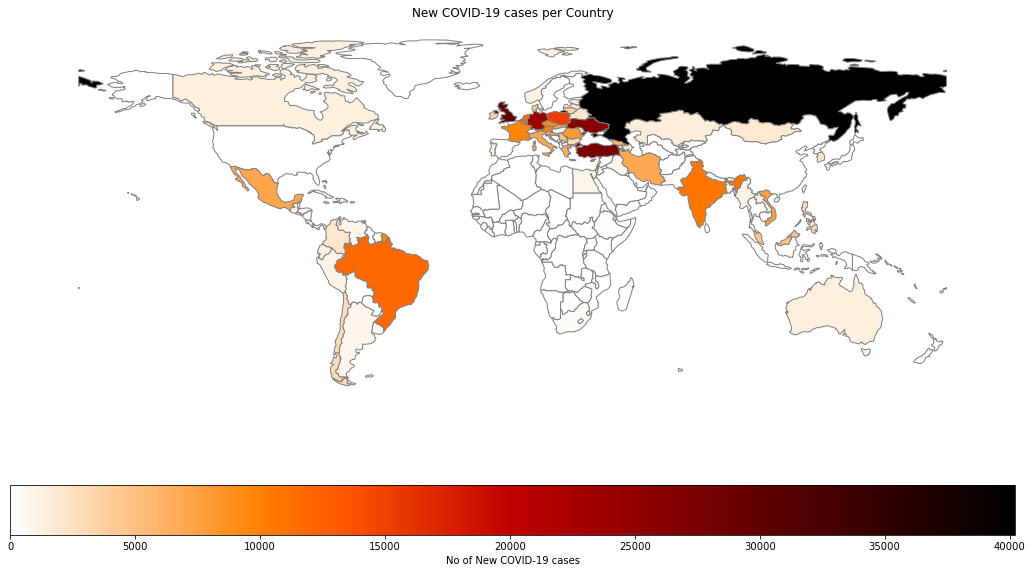

In [77]:
# grad the inbuilt world map from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

# take the current new case numbers
df_covid_current = df_covid[df_covid['date']==df_covid['date'].max()]

# merged data frame is generated based on df_covid_current and world GeoPandas dataframe
cworld = world.merge(df_covid_current, how='left',left_on='name',right_on='location')
cworld = cworld[world.name!="Antarctica"]
cworld['new_cases'] = cworld['new_cases'].fillna(0)

# generate the choropleth map using gdf plot function on the new_cases column
fig = cworld.plot(column='new_cases',cmap='gist_heat_r', edgecolor='grey', figsize=(18,10), legend = True
            ,legend_kwds={'label': "No of New COVID-19 cases",
                          'orientation': "horizontal"})
plt.axis('off')
plt.title("New COVID-19 cases per Country")
plt.show()

In [102]:
dates = np.sort(df_covid['date'].unique(), axis=0)

index = (0, len(dates)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=dates,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

mergedworld = pd.DataFrame()
for i in dates:
    mergetemp = world.merge(df_covid[df_covid['date'] == i], left_on='name',right_on='country',how='left')
    mergedworld = mergedworld.append(mergetemp)
def worldplot(date):
    mergedworld[mergedworld['date'] == date[0]].plot(
        column='new_cases'
        , cmap='gist_heat_r'
        , edgecolor='grey'
        , figsize=(20,9)
        , legend = True
    )
    plt.axis('off')
    plt.title("New COVID-19 cases per Country")
    plt.show()

interact(worldplot, date=selection_range_slider)

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 675), layout=Layout(width='500px'), …

<function __main__.worldplot(date)>